,input,output,label
0,tic1.fit,tic1.fit,1
1,tic2.fit,tic2.fit,1
2,tic3.fit,tic3.fit,1
3,A012_ PSN_J12355230plus2755559_R_600s_ZWO ASI1...,tic4.fit,0
4,MPC_Cslash2022-QE78_B_180s_ZWO ASI1600MM-Cool_...,tic5.fit,0
5,tic6.fit,tic6.fit,1
6,A012_ PSN_J12355230plus2755559_R_600s_ZWO ASI1...,tic7.fit,0
7,MPC_12PslashPons-Brooks_B_180s_ZWO ASI1600MM-C...,tic8.fit,0
8,MPC_12PslashPons-Brooks_B_180s_ZWO ASI1600MM-C...,tic9.fit,0
9,MPC_12PslashPons-Brooks_R_120s_ZWO ASI1600MM-C...,tic10.fit,1


Filtered image saved: ./Data/fits_filtered8/tic1.png
Filtered image saved: ./Data/fits_filtered8/tic10.png
Filtered image saved: ./Data/fits_filtered8/tic11.png
Filtered image saved: ./Data/fits_filtered8/tic12.png
Filtered image saved: ./Data/fits_filtered8/tic13.png
Filtered image saved: ./Data/fits_filtered8/tic14.png
Filtered image saved: ./Data/fits_filtered8/tic15.png
Filtered image saved: ./Data/fits_filtered8/tic16.png
Filtered image saved: ./Data/fits_filtered8/tic17.png
Filtered image saved: ./Data/fits_filtered8/tic18.png
Filtered image saved: ./Data/fits_filtered8/tic19.png
Filtered image saved: ./Data/fits_filtered8/tic2.png
Filtered image saved: ./Data/fits_filtered8/tic20.png


MemoryError: 

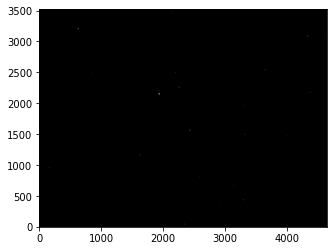

In [1]:
import os
import numpy as np
import pandas as pd
from astropy.io import fits
from scipy.ndimage import median_filter
from skimage import filters, feature, morphology
import matplotlib.pyplot as plt

def find_latest_dictionary_csv(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.startswith('dictionary') and f.endswith('.csv')]
    if not csv_files:
        print("No dictionary CSV file found.")
        return None
    latest_csv = max(csv_files)
    return latest_csv

def load_and_preprocess_image(fits_path):
    image = fits.getdata(fits_path, ext=0)
    image = image - np.nanmedian(image)
    image = median_filter(image, size=3)
    return image

def detect_trails(image):
    edges = filters.sobel(image)
    edges = feature.canny(edges, sigma=2)
    return edges

def enhance_trails(trails):
    enhanced_trails = morphology.dilation(trails, morphology.square(3))
    return enhanced_trails

def plot_and_save_image(image, trails, save_path):
    plt.imshow(image, cmap='gray', origin='lower')
    plt.contour(trails, colors='red', linewidths=0.5)
    plt.axis('off')
    plt.title('')
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()
    print(f"Filtered image saved: {save_path}")

fits_dir = './Data/fits/'
filtered_dir = './Data/fits_filtered8/'
os.makedirs(filtered_dir, exist_ok=True)
latest_csv = find_latest_dictionary_csv(fits_dir)

if latest_csv:
    csv_path = os.path.join(fits_dir, latest_csv)
    dictionary_df = pd.read_csv(csv_path)
    display(dictionary_df)
    
    fits_files = [f for f in os.listdir(fits_dir) if f.endswith('.fit')]
    
    for fits_file in fits_files:
        fits_path = os.path.join(fits_dir, fits_file)
        image = load_and_preprocess_image(fits_path)
        trails = detect_trails(image)
        enhanced_trails = enhance_trails(trails)
        filtered_image_path = os.path.join(filtered_dir, f'{os.path.splitext(fits_file)[0]}.png')
        plot_and_save_image(image, enhanced_trails, filtered_image_path)
        
        old_filename = os.path.splitext(fits_file)[0] + '.fit'
        new_filename = os.path.splitext(fits_file)[0] + '.png'
        dictionary_df['output'] = dictionary_df['output'].replace(old_filename, new_filename)

    updated_csv_path = os.path.join(filtered_dir, latest_csv)
    display(dictionary_df)
    dictionary_df.to_csv(updated_csv_path, index=False)
    print(f"Updated CSV file saved: {updated_csv_path}")
else:
    print("No CSV file found.")
